In [ ]:
# Resume Classifier Implementation - Steps 0 & 1
# File: resume_classifier.ipynb

import os
import json
import numpy as np
import pandas as pd
import random
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

# Step 0 - Project Setup
print("=== Step 0: Project Setup ===")

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Create project structure
project_folders = ['data', 'models', 'data/domain_requirements', "src"]
for folder in project_folders:
    Path(folder).mkdir(parents=True, exist_ok=True)
    print(f"Created folder: {folder}")

print("Project structure created successfully!")

In [ ]:
import json
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("=== Step 1: Balanced Dataset Generation ===\n")

# Domain Requirements
domain_requirements = {
    "data_science": {
        "domain": "Data Science",
        "required_skills": ["Python", "Pandas", "NumPy", "Scikit-learn", "PyTorch", "Docker", "Deep Learning"]
    },
    "web_development": {
        "domain": "Web Development", 
        "required_skills": ["JavaScript", "React", "Node.js", "HTML", "CSS", "MongoDB", "Express"]
    },
    "mobile_development": {
        "domain": "Mobile Development",
        "required_skills": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "iOS", "Android"]
    },
    "devops": {
        "domain": "DevOps",
        "required_skills": ["Docker", "Kubernetes", "AWS", "Jenkins", "Terraform", "Linux", "CI/CD"]
    },
    "cybersecurity": {
        "domain": "Cybersecurity",
        "required_skills": ["Network Security", "Penetration Testing", "CISSP", "Firewall", "Encryption", "Python", "Risk Assessment"]
    }
}

# Save all domain requirements in a single JSON file
os.makedirs('data', exist_ok=True)
with open('data/domain_requirements.json', 'w') as f:
    json.dump(domain_requirements, f, indent=2)

print("Saved → data/domain_requirements.json")

# Skill pools
all_skills = {
    "data_science": ["Python", "R", "SQL", "Pandas", "NumPy", "Scikit-learn", "TensorFlow", "PyTorch", 
                    "Matplotlib", "Seaborn", "Jupyter", "Docker", "Deep Learning", "Machine Learning", 
                    "Statistics", "Data Visualization", "Big Data", "Spark", "Hadoop"],
    "web_dev": ["JavaScript", "React", "Vue.js", "Angular", "Node.js", "Express", "HTML", "CSS", 
               "MongoDB", "PostgreSQL", "MySQL", "Redis", "GraphQL", "REST API", "TypeScript", 
               "Webpack", "Git", "Bootstrap", "Sass"],
    "mobile": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "Dart", "iOS", "Android", 
              "Xcode", "Android Studio", "Firebase", "SQLite", "Core Data", "UIKit", "SwiftUI"],
    "devops": ["Docker", "Kubernetes", "AWS", "Azure", "GCP", "Jenkins", "Terraform", "Ansible", 
              "Linux", "Bash", "Python", "CI/CD", "Git", "Monitoring", "Nagios", "Prometheus"],
    "security": ["Network Security", "Penetration Testing", "CISSP", "CEH", "Firewall", "Encryption", 
                "Python", "Wireshark", "Metasploit", "Nmap", "Risk Assessment", "Compliance", "SIEM"]
}

# Project templates
project_templates = {
    "data_science": ["Customer Churn Prediction", "Sales Forecasting Model", "Recommendation System", 
                    "Fraud Detection Algorithm", "Image Classification", "Natural Language Processing"],
    "web_dev": ["E-commerce Website", "Social Media Platform", "Portfolio Website", "Blog Platform", 
               "Task Management App", "Real-time Chat Application"],
    "mobile": ["Weather App", "Fitness Tracker", "Food Delivery App", "Social Media App", 
              "Game Application", "Banking App"],
    "devops": ["CI/CD Pipeline Setup", "Infrastructure as Code", "Container Orchestration", 
              "Monitoring Dashboard", "Automated Deployment", "Cloud Migration"],
    "security": ["Vulnerability Assessment", "Security Audit", "Network Monitoring System", 
                "Incident Response Plan", "Security Training Program", "Compliance Framework"]
}

# Job titles
job_titles = {
    "data_science": ["Data Scientist", "ML Engineer", "Data Analyst", "Research Scientist"],
    "web_dev": ["Frontend Developer", "Backend Developer", "Full Stack Developer", "Web Developer"],
    "mobile": ["iOS Developer", "Android Developer", "Mobile Developer", "App Developer"],
    "devops": ["DevOps Engineer", "Site Reliability Engineer", "Cloud Engineer", "Infrastructure Engineer"],
    "security": ["Security Analyst", "Cybersecurity Engineer", "Security Consultant", "SOC Analyst"]
}

skill_key_mapping = {
    "data_science": "data_science",
    "web_development": "web_dev", 
    "mobile_development": "mobile",
    "devops": "devops",
    "cybersecurity": "security"
}

def generate_resume_for_category(category, candidate_id, domains):
    """Generate a resume targeting a specific fit category"""
    
    preferred_domain_key = random.choice(domains)
    preferred_domain = domain_requirements[preferred_domain_key]["domain"]
    required_skills = domain_requirements[preferred_domain_key]["required_skills"]
    
    domain_skills = all_skills[skill_key_mapping[preferred_domain_key]]
    other_skills = list(set(sum(all_skills.values(), [])) - set(domain_skills))
    
    # Generate skills based on category
    if category == 'fit':
        required_count = max(1, int(len(required_skills) * random.uniform(0.7, 1.0)))
        selected_required = random.sample(required_skills, required_count)
        additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(2, 5))
        selected_skills = selected_required + additional_domain
        test_score = int(random.uniform(75, 100))
        n_projects = random.randint(1, 4)
        
    elif category == 'partial_fit':
        if random.choice([True, False]):
            required_count = max(1, int(len(required_skills) * random.uniform(0.4, 0.69)))
            selected_required = random.sample(required_skills, required_count)
            additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 3))
            selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(30, 100))
        else:
            required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
            selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
            additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 4))
            selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(50, 74))
        n_projects = random.randint(0, 3)
        
    else:  # not_fit
        if random.choice([True, False]):
            required_count = max(0, int(len(required_skills) * random.uniform(0.0, 0.39)))
            selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
            
            if random.choice([True, False]):
                selected_skills = selected_required + random.sample(other_skills, random.randint(2, 6))
            else:
                additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(0, 2))
                selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(0, 100))
        else:
            required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
            selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
            additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 4))
            selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(0, 49))
        n_projects = random.randint(0, 2)
    
    # Add random other skills
    if len(selected_skills) < 8:
        selected_skills.extend(random.sample(other_skills, random.randint(0, 3)))
    
    # Generate projects
    domain_projects = project_templates[skill_key_mapping[preferred_domain_key]]
    selected_projects = random.sample(domain_projects, min(n_projects, len(domain_projects)))
    
    # Generate work experience
    n_jobs = random.randint(1, 4)
    domain_job_titles = job_titles[skill_key_mapping[preferred_domain_key]]
    work_experience = [{"title": random.choice(domain_job_titles), "years": random.randint(1, 8)} for _ in range(n_jobs)]
    
    return {
        "skills": list(set(selected_skills)),
        "projects": selected_projects,
        "work_experience": work_experience,
        "test_score": test_score,
        "preferred_domain": preferred_domain,
        "id": f"candidate_{candidate_id:04d}"
    }

def generate_balanced_resumes(n_samples=2000, target_distribution=None):
    """Generate synthetic resume data with balanced labels"""
    
    if target_distribution is None:
        target_distribution = {'fit': 0.33, 'partial_fit': 0.34, 'not_fit': 0.33}
    
    n_fit = int(n_samples * target_distribution['fit'])
    n_partial = int(n_samples * target_distribution['partial_fit'])
    n_not_fit = n_samples - n_fit - n_partial
    
    domains = list(domain_requirements.keys())
    resumes = []
    candidate_id = 1
    
    for _ in range(n_fit):
        resumes.append(generate_resume_for_category('fit', candidate_id, domains))
        candidate_id += 1
    
    for _ in range(n_partial):
        resumes.append(generate_resume_for_category('partial_fit', candidate_id, domains))
        candidate_id += 1
    
    for _ in range(n_not_fit):
        resumes.append(generate_resume_for_category('not_fit', candidate_id, domains))
        candidate_id += 1
    
    random.shuffle(resumes)
    return resumes
    
# Generate and label dataset
synthetic_resumes = generate_balanced_resumes(2000)

# Save dataset
os.makedirs('data', exist_ok=True)
with open('data/synthetic_resumes.json', 'w') as f:
    json.dump(synthetic_resumes, f, indent=2)

Generated 2000 resumes → data/balanced_synthetic_resumes.json

Dataset Statistics:
Total: 2000 | Avg Test Score: 63.2

Label Distribution:
label
Partial Fit    821
Fit            678
Not Fit        501
Name: count, dtype: int64


=== Analysis by Domain ===
label               Fit  Not Fit  Partial Fit
preferred_domain                             
Cybersecurity       130      107          164
Data Science        126      107          149
DevOps              143       98          150
Mobile Development  145       82          189
Web Development     134      107          169


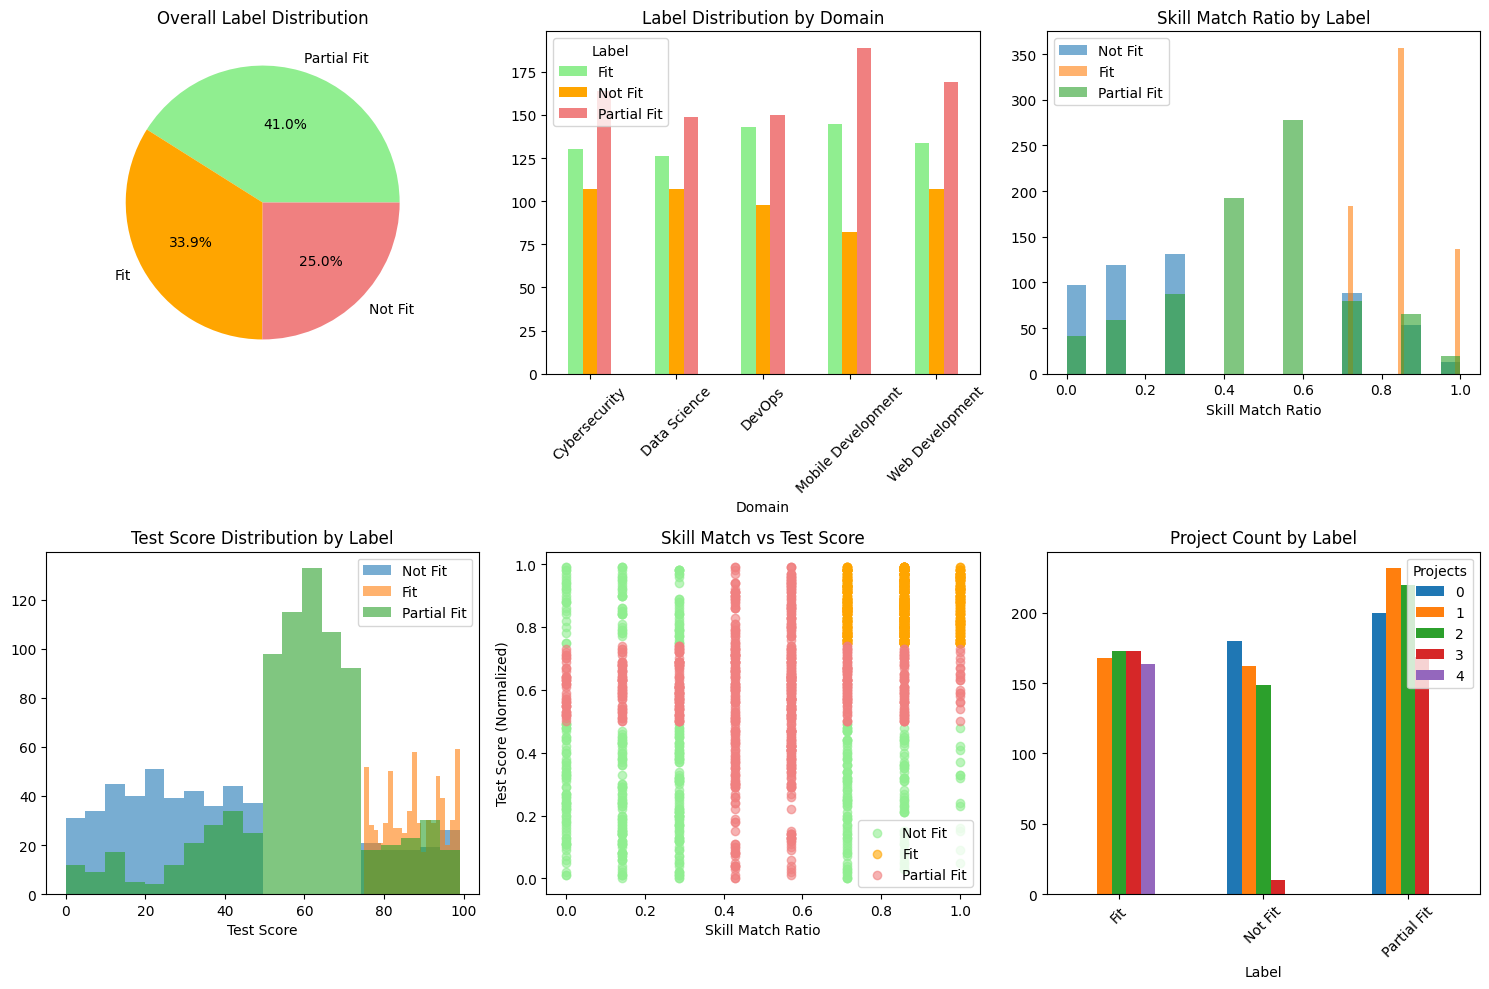

Analysis saved → data/labeling_analysis.png


In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('data/domain_requirements.json', 'r') as f:
    domain_requirements = json.load(f)
    
def calculate_labels(resumes):
    """Calculate labels for resumes based on rules"""
    labeled_resumes = []
    
    for resume in resumes:
        preferred_domain_key = next((k for k, v in domain_requirements.items() if v["domain"] == resume["preferred_domain"]), None)
        if not preferred_domain_key:
            continue
            
        required_skills = set(domain_requirements[preferred_domain_key]["required_skills"])
        candidate_skills = set(resume["skills"])
        
        skill_match_ratio = len(required_skills.intersection(candidate_skills)) / len(required_skills)
        test_score_norm = resume["test_score"] / 100.0
        project_count = len(resume["projects"])
        
        # Apply labeling rules
        if skill_match_ratio >= 0.70 and test_score_norm >= 0.75 and project_count >= 1:
            label = "Fit"
        elif (0.40 <= skill_match_ratio < 0.70) or (0.50 <= test_score_norm < 0.75):
            label = "Partial Fit"
        else:
            label = "Not Fit"
        
        resume_with_label = resume.copy()
        resume_with_label.update({
            "skill_match_ratio": skill_match_ratio,
            "test_score_norm": test_score_norm,
            "project_count": project_count,
            "label": label
        })
        labeled_resumes.append(resume_with_label)
    
    return labeled_resumes

with open('data/synthetic_resumes.json', 'r') as f:
    synthetic_resumes = json.load(f)
    
labeled_resumes = calculate_labels(synthetic_resumes)

os.makedirs('data', exist_ok=True)
with open('data/labeled_synthetic_resumes.json', 'w') as f:
    json.dump(labeled_resumes, f, indent=2)
    
print(f"Generated {len(labeled_resumes)} resumes → data/balanced_synthetic_resumes.json\n")

# Statistics
df = pd.DataFrame(labeled_resumes)
label_counts = df['label'].value_counts()

print("Dataset Statistics:")
print(f"Total: {len(df)} | Avg Test Score: {df['test_score'].mean():.1f}")
print(f"\nLabel Distribution:\n{label_counts}\n")

# Detailed analysis
print("\n=== Analysis by Domain ===")
domain_label_crosstab = pd.crosstab(df['preferred_domain'], df['label'])
print(domain_label_crosstab)

# Visualization (Comprehensive)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
colors = ['lightgreen', 'orange', 'lightcoral']

# Pie chart - Overall Label Distribution
axes[0, 0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=colors)
axes[0, 0].set_title('Overall Label Distribution')

# Bar chart - Label distribution by domain
domain_label_crosstab.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_title('Label Distribution by Domain')
axes[0, 1].set_xlabel('Domain')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Label')

# Skill match ratio by label
for label in df['label'].unique():
    data = df[df['label'] == label]['skill_match_ratio']
    axes[0, 2].hist(data, alpha=0.6, label=label, bins=20)
axes[0, 2].set_xlabel('Skill Match Ratio')
axes[0, 2].set_title('Skill Match Ratio by Label')
axes[0, 2].legend()

# Test score by label
for label in df['label'].unique():
    data = df[df['label'] == label]['test_score']
    axes[1, 0].hist(data, alpha=0.6, label=label, bins=20)
axes[1, 0].set_xlabel('Test Score')
axes[1, 0].set_title('Test Score Distribution by Label')
axes[1, 0].legend()

# Scatter plot - Skill match vs Test score
for i, label in enumerate(df['label'].unique()):
    data = df[df['label'] == label]
    axes[1, 1].scatter(data['skill_match_ratio'], data['test_score_norm'], 
                        alpha=0.6, label=label, color=colors[i])
axes[1, 1].set_xlabel('Skill Match Ratio')
axes[1, 1].set_ylabel('Test Score (Normalized)')
axes[1, 1].set_title('Skill Match vs Test Score')
axes[1, 1].legend()

# Project count by label
project_counts_by_label = df.groupby(['label', 'project_count']).size().unstack(fill_value=0)
project_counts_by_label.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Project Count by Label')
axes[1, 2].set_xlabel('Label')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].legend(title='Projects')

plt.tight_layout()
plt.savefig('data/labeling_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("Analysis saved → data/labeling_analysis.png")


In [3]:
# ============================================================================
# Step 3: Preprocessing & Feature Engineering
# ============================================================================
print("\n=== Step 3: Feature Engineering ===")
import os
import json

from sklearn.preprocessing import StandardScaler

def build_skill_vocabulary(resumes, domain_requirements):
    """Build comprehensive skill vocabulary"""
    all_skills = set()
    for resume in resumes:
        all_skills.update(resume.get('skills', []))
    for domain_data in domain_requirements.values():
        all_skills.update(domain_data.get('required_skills', []))
    
    cleaned_skills = {skill.strip().lower() for skill in all_skills if skill.strip() and len(skill.strip()) > 1}
    return sorted(list(cleaned_skills))

def encode_skills(candidate_skills, skill_vocab):
    """Convert skills to binary vector"""
    skill_vector = np.zeros(len(skill_vocab), dtype=int)
    normalized_skills = {skill.strip().lower() for skill in candidate_skills}
    for i, vocab_skill in enumerate(skill_vocab):
        if vocab_skill in normalized_skills:
            skill_vector[i] = 1
    return skill_vector

def compute_skill_matches(candidate_skills, required_skills):
    """Compute matched and missing skills"""
    candidate_set = {skill.strip().lower() for skill in candidate_skills}
    required_set = {skill.strip().lower() for skill in required_skills}
    
    matched_skills = list(candidate_set.intersection(required_set))
    missing_skills = list(required_set - candidate_set)
    skill_match_ratio = len(matched_skills) / len(required_set) if required_set else 0.0
    
    return matched_skills, missing_skills, skill_match_ratio

def suggest_alternative_domains(candidate_skills, current_domain, domain_requirements, top_n=3):
    """Suggest alternative domains based on skill match"""
    suggestions = []
    
    for domain_key, domain_info in domain_requirements.items():
        domain_name = domain_info["domain"]
        if domain_name == current_domain:
            continue
        
        required_skills = domain_info["required_skills"]
        matched, missing, ratio = compute_skill_matches(candidate_skills, required_skills)
        
        suggestions.append({
            'domain': domain_name,
            'domain_key': domain_key,
            'skill_match_ratio': ratio,
            'matched_skills': matched,
            'missing_skills': missing,
            'matched_count': len(matched),
            'required_count': len(required_skills)
        })
    
    suggestions.sort(key=lambda x: x['skill_match_ratio'], reverse=True)
    return suggestions[:top_n]

def extract_project_features(projects):
    """Extract features from projects"""
    project_count = len(projects) if projects else 0
    project_text = " ".join(projects) if projects else ""
    return project_count, project_text

def extract_experience_features(work_experience):
    """Extract features from work experience"""
    if not work_experience:
        return 0.0, 0, ""
    
    years_experience = sum(item.get('years', 0) for item in work_experience)
    max_years = max(item.get('years', 0) for item in work_experience)
    job_titles = [item.get('title', '') for item in work_experience]
    experience_text = " ".join(job_titles)
    
    return float(years_experience), max_years, experience_text

class ResumeFeatureScaler:
    """Scaler for numeric resume features"""
    def __init__(self):
        self.project_scaler = StandardScaler()
        self.experience_scaler = StandardScaler()
        self.is_fitted = False
    
    def fit(self, numeric_features):
        if len(numeric_features) == 0:
            return self
        
        numeric_array = np.array(numeric_features)
        if numeric_array.shape[1] >= 3:
            self.experience_scaler.fit(numeric_array[:, :2])
            self.project_scaler.fit(numeric_array[:, 2:3])
        
        self.is_fitted = True
        return self
    
    def transform(self, numeric_features):
        if not self.is_fitted:
            raise ValueError("Scaler must be fitted before transform")
        
        numeric_array = np.array(numeric_features)
        if numeric_array.ndim == 1:
            numeric_array = numeric_array.reshape(1, -1)
        
        if numeric_array.shape[1] >= 3:
            scaled_experience = self.experience_scaler.transform(numeric_array[:, :2])
            scaled_projects = self.project_scaler.transform(numeric_array[:, 2:3])
            return np.concatenate([scaled_experience, scaled_projects], axis=1)
        
        return np.array([])
    
    def fit_transform(self, numeric_features):
        return self.fit(numeric_features).transform(numeric_features)

def extract_all_features(resume, skill_vocab, domain_requirements):
    """Extract all features from a single resume"""
    domain_key = next((k for k, v in domain_requirements.items() if v["domain"] == resume["preferred_domain"]), None)
    if domain_key is None:
        raise ValueError(f"No requirements found for domain {resume['preferred_domain']}")
    
    required_skills = domain_requirements[domain_key]["required_skills"]
    candidate_skills = resume.get('skills', [])
    projects = resume.get('projects', [])
    work_experience = resume.get('work_experience', [])
    test_score = resume.get('test_score', 0)
    
    skill_vector = encode_skills(candidate_skills, skill_vocab)
    matched_skills, missing_skills, skill_match_ratio = compute_skill_matches(candidate_skills, required_skills)
    project_count, project_text = extract_project_features(projects)
    years_experience, max_years, experience_text = extract_experience_features(work_experience)
    test_score_norm = max(0, min(100, float(test_score))) / 100.0
    numeric_features = [years_experience, max_years, project_count]
    alternative_domains = suggest_alternative_domains(candidate_skills, resume['preferred_domain'], domain_requirements, top_n=3)
    
    return {
        'skill_vector': skill_vector,
        'skill_match_ratio': skill_match_ratio,
        'matched_skills': matched_skills,
        'missing_skills': missing_skills,
        'project_count': project_count,
        'project_text': project_text,
        'years_experience': years_experience,
        'max_years': max_years,
        'experience_text': experience_text,
        'test_score': test_score,
        'test_score_norm': test_score_norm,
        'numeric_features': numeric_features,
        'domain': resume['preferred_domain'],
        'id': resume['id'],
        'alternative_domains': alternative_domains
    }

# Ensure data directory exists
os.makedirs('data', exist_ok=True)

# Load labeled resumes from JSON file
with open('data/balanced_synthetic_resumes.json', 'r') as f:
    labeled_resumes = json.load(f)

with open('data/domain_requirements.json', 'r') as f:
    domain_requirements = json.load(f)

# Build vocabulary and extract features
skill_vocab = build_skill_vocabulary(labeled_resumes, domain_requirements)
print(f"Skill vocabulary: {len(skill_vocab)} unique skills")

all_features = []
for resume in labeled_resumes:
    try:
        features = extract_all_features(resume, skill_vocab, domain_requirements)
        features['label'] = resume['label']
        all_features.append(features)
    except Exception as e:
        continue

print(f"Extracted features from {len(all_features)} resumes")

# Scale numeric features
numeric_feature_matrix = [f['numeric_features'] for f in all_features]
scaler = ResumeFeatureScaler()
scaler.fit(numeric_feature_matrix)

for features in all_features:
    scaled_numeric = scaler.transform([features['numeric_features']])
    features['scaled_numeric_features'] = scaled_numeric[0]

# Save artifacts
with open('data/skill_vocab.json', 'w') as f:
    json.dump(skill_vocab, f, indent=2)

sample_features = all_features[:5]
for features in sample_features:
    features['skill_vector'] = features['skill_vector'].tolist()
    features['scaled_numeric_features'] = features['scaled_numeric_features'].tolist()

with open('data/sample_features.json', 'w') as f:
    json.dump(sample_features, f, indent=2)

print(f"\nFeature Summary (sample):")
print(f"  Skill match ratio: {all_features[0]['skill_match_ratio']:.3f}")
print(f"  Projects: {all_features[0]['project_count']} | Experience: {all_features[0]['years_experience']:.0f} yrs")
print(f"  Top alternative: {all_features[0]['alternative_domains'][0]['domain']} "
      f"({all_features[0]['alternative_domains'][0]['skill_match_ratio']:.3f} match)")

print("Saved → data/skill_vocab.json, data/sample_features.json")


=== Step 3: Feature Engineering ===
Skill vocabulary: 77 unique skills
Extracted features from 2000 resumes

Feature Summary (sample):
  Skill match ratio: 0.571
  Projects: 1 | Experience: 21 yrs
  Top alternative: DevOps (0.286 match)
Saved → data/skill_vocab.json, data/sample_features.json


In [5]:
# ============================================================================
# Step 4: Final Feature Vector Construction
# ============================================================================
print("\n=== Step 4: Feature Vector Construction ===")

from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

class FeatureVectorBuilder:
    """Builds final feature vectors using parallel branches"""
    
    def __init__(self, skill_vocab_size, use_text_embeddings=False):
        self.skill_vocab_size = skill_vocab_size
        self.use_text_embeddings = use_text_embeddings
        self.project_vectorizer = TfidfVectorizer(max_features=64, stop_words='english', ngram_range=(1, 2), min_df=2)
        self.experience_vectorizer = TfidfVectorizer(max_features=64, stop_words='english', ngram_range=(1, 2), min_df=2)
        self.is_fitted = False
    
    def fit_text_vectorizers(self, all_features):
        project_texts = [f.get('project_text', '') or 'no projects' for f in all_features]
        experience_texts = [f.get('experience_text', '') or 'no experience' for f in all_features]
        
        self.project_vectorizer.fit(project_texts)
        self.experience_vectorizer.fit(experience_texts)
        self.is_fitted = True
    
    def build_skill_branch(self, features):
        """Branch 1: Skills (binary vector + match ratio)"""
        return np.concatenate([features['skill_vector'], [features['skill_match_ratio']]])
    
    def build_numeric_branch(self, features):
        """Branch 2: Numeric features"""
        scaled = features['scaled_numeric_features']
        return np.array([
            features['test_score_norm'],
            scaled[2],  # project_count_scaled
            scaled[0],  # years_experience_scaled
            features['skill_match_ratio']
        ])
    
    def build_text_branch(self, features):
        """Branch 3: Text embeddings (optional)"""
        if not self.use_text_embeddings or not self.is_fitted:
            return np.array([])
        
        project_text = features.get('project_text', '') or 'no projects'
        experience_text = features.get('experience_text', '') or 'no experience'
        
        project_vector = self.project_vectorizer.transform([project_text]).toarray().flatten()
        experience_vector = self.experience_vectorizer.transform([experience_text]).toarray().flatten()
        
        return np.concatenate([project_vector, experience_vector])
    
    def build_final_vector(self, features):
        """Concatenate all branches"""
        branches = [self.build_skill_branch(features), self.build_numeric_branch(features)]
        
        if self.use_text_embeddings and self.is_fitted:
            text_branch = self.build_text_branch(features)
            if len(text_branch) > 0:
                branches.append(text_branch)
        
        return np.concatenate(branches)
    
    def get_feature_dimensions(self):
        skill_dim = self.skill_vocab_size + 1
        numeric_dim = 4
        text_dim = 128 if self.use_text_embeddings else 0
        return {
            'skill_branch_dim': skill_dim,
            'numeric_branch_dim': numeric_dim,
            'text_branch_dim': text_dim,
            'final_vector_dim': skill_dim + numeric_dim + text_dim
        }

# Build feature vectors
use_text_features = True
vector_builder = FeatureVectorBuilder(skill_vocab_size=len(skill_vocab), use_text_embeddings=use_text_features)

if use_text_features:
    vector_builder.fit_text_vectorizers(all_features)

feature_vectors = []
labels = []

for features in all_features:
    try:
        feature_vectors.append(vector_builder.build_final_vector(features))
        labels.append(features['label'])
    except Exception as e:
        continue

X = np.array(feature_vectors)
y = np.array(labels)

dimensions = vector_builder.get_feature_dimensions()
print(f"Feature vectors built: {X.shape}")
print(f"  Skill: {dimensions['skill_branch_dim']} | Numeric: {dimensions['numeric_branch_dim']} | Text: {dimensions['text_branch_dim']}")
print(f"  Sparsity: {np.mean(X == 0):.2%}")

unique_labels, label_counts = np.unique(y, return_counts=True)
print(f"\nLabel distribution: {dict(zip(unique_labels, label_counts))}")

# Save artifacts
np.save('data/X_features.npy', X)
np.save('data/y_labels.npy', y)

with open('data/feature_vector_builder.pkl', 'wb') as f:
    pickle.dump(vector_builder, f)

label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
with open('data/label_mapping.json', 'w') as f:
    json.dump({
        'label_to_idx': label_to_idx,
        'idx_to_label': {idx: label for idx, label in enumerate(unique_labels)},
        'unique_labels': unique_labels.tolist()
    }, f, indent=2)

with open('data/feature_dimensions.json', 'w') as f:
    json.dump(dimensions, f, indent=2)

print("Saved → X_features.npy, y_labels.npy, feature_vector_builder.pkl, label_mapping.json")


=== Step 4: Feature Vector Construction ===
Feature vectors built: (2000, 210)
  Skill: 78 | Numeric: 4 | Text: 128
  Sparsity: 89.16%

Label distribution: {np.str_('Fit'): np.int64(673), np.str_('Not Fit'): np.int64(468), np.str_('Partial Fit'): np.int64(859)}
Saved → X_features.npy, y_labels.npy, feature_vector_builder.pkl, label_mapping.json


In [ ]:
# ============================================================================
# Step 5: Model Architecture (Keras/TensorFlow) - CORRECTED
# ============================================================================
print("\n=== Step 5: Model Architecture ===")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

tf.random.set_seed(42)

class ResumeClassifierModel:
    """Hybrid neural network for resume classification with parallel branches"""
    
    def __init__(self, skill_vocab_size, numeric_dim, text_dim=0, num_classes=3):
        self.skill_vocab_size = skill_vocab_size
        self.numeric_dim = numeric_dim
        self.text_dim = text_dim
        self.num_classes = num_classes
        self.use_text_branch = text_dim > 0
        self.model = None
        self.label_encoder = LabelEncoder()
        self.is_compiled = False
        
    def build_model(self):
        """Build hybrid model architecture with parallel branches"""
        skill_input = Input(shape=(self.skill_vocab_size + 1,), name='skill_input')
        numeric_input = Input(shape=(self.numeric_dim,), name='numeric_input')
        inputs = [skill_input, numeric_input]
        
        x1 = layers.Dense(256, activation='relu')(skill_input)
        x1 = layers.Dropout(0.3)(x1)
        x1 = layers.Dense(128, activation='relu')(x1)
        
        x2 = layers.Dense(32, activation='relu')(numeric_input)
        x2 = layers.Dense(16, activation='relu')(x2)
        
        branches_to_concat = [x1, x2]
        
        if self.use_text_branch:
            text_input = Input(shape=(self.text_dim,), name='text_input')
            inputs.append(text_input)
            x3 = layers.Dense(128, activation='relu')(text_input)
            x3 = layers.Dense(64, activation='relu')(x3)
            branches_to_concat.append(x3)
        
        concat = layers.concatenate(branches_to_concat)
        h = layers.Dense(128, activation='relu')(concat)
        h = layers.Dropout(0.3)(h)
        h = layers.Dense(64, activation='relu')(h)
        output = layers.Dense(self.num_classes, activation='softmax')(h)
        
        self.model = Model(inputs=inputs, outputs=output)
        return self.model
    
    def compile_model(self, learning_rate=1e-3):
        if self.model is None:
            self.build_model()
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=learning_rate),
            metrics=['accuracy']
        )
        self.is_compiled = True

# CRITICAL: Load saved artifacts to match feature dimensions
with open('data/skill_vocab.json', 'r') as f:
    skill_vocab = json.load(f)

with open('data/feature_dimensions.json', 'r') as f:
    dimensions = json.load(f)

with open('data/label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

# Verify dimensions match saved features
X = np.load('data/X_features.npy')
print(f"Loaded features shape: {X.shape}")
print(f"Skill vocab size: {len(skill_vocab)}")
print(f"Expected skill branch: {len(skill_vocab) + 1} (vocab + match_ratio)")
print(f"Feature dimensions: {dimensions}")

model_classifier = ResumeClassifierModel(
    skill_vocab_size=len(skill_vocab),
    numeric_dim=dimensions['numeric_branch_dim'],
    text_dim=dimensions['text_branch_dim'],
    num_classes=len(label_mapping['unique_labels'])
)

model_classifier.build_model()
model_classifier.compile_model()
model = model_classifier.model

print(f"\nModel expects:")
for i, inp in enumerate(model.inputs):
    print(f"  Input {i}: {inp.shape}")



model.summary()

In [ ]:
# ============================================================================
# Step 6: Training Procedure
# ============================================================================
print("\n=== Step 6: Training Procedure ===")

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes=len(label_mapping['unique_labels']))

# Train/val/test split: 70/15/15 stratified
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_categorical, 
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp.argmax(axis=1)
)

print(f"Split: Train={X_train.shape[0]} | Val={X_val.shape[0]} | Test={X_test.shape[0]}")

# Prepare inputs for each split
train_inputs = model_classifier.prepare_inputs(X_train)
val_inputs = model_classifier.prepare_inputs(X_val)
test_inputs = model_classifier.prepare_inputs(X_test)

# Compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_train.argmax(axis=1)
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights_array)}

# Setup callbacks
os.makedirs('models', exist_ok=True)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='models/best_resume_classifier.h5', monitor='val_loss', 
                   save_best_only=True, verbose=1)
]

# Training hyperparameters
BATCH_SIZE = 32
EPOCHS = 50

print(f"Training: {EPOCHS} epochs, batch_size={BATCH_SIZE}")

# Train the model
history = model.fit(
    train_inputs,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_inputs, y_val),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# Save training history
with open('data/training_history.json', 'w') as f:
    history_dict = {key: [float(v) for v in values] for key, values in history.history.items()}
    json.dump(history_dict, f, indent=2)

# Save Keras model
model_classifier.model.save('models/resume_classifier_complete.h5')

# Save configuration for production
model_config = {
    "use_text_branch": model_classifier.use_text_branch,
    "skill_vocab_size": model_classifier.skill_vocab_size,
    "numeric_dim": model_classifier.numeric_dim,
    "text_dim": model_classifier.text_dim,
    "num_classes": model_classifier.num_classes
}

import json
from pathlib import Path
Path('artifacts').mkdir(exist_ok=True)
with open('artifacts/model_config.json', 'w') as f:
    json.dump(model_config, f, indent=2)


# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['loss'], label='Train', marker='o')
axes[0].plot(history.history['val_loss'], label='Val', marker='s')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Train', marker='o')
axes[1].plot(history.history['val_accuracy'], label='Val', marker='s')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('data/training_history.png', dpi=150, bbox_inches='tight')
plt.show()

print("Training complete → models/best_resume_classifier.h5")

In [16]:
# ============================================================================
# Step 10: Final JSON Output Generation with Model Loading (UPDATED)
# ============================================================================
print("\n=== Step 10: Final JSON Output Generation ===")

import json
import joblib
from datetime import datetime
from pathlib import Path
import keras
import numpy as np

class ResumeClassificationPipeline:
    """Complete pipeline for resume classification with JSON output"""
    
    def __init__(self, model, feature_builder, label_encoder, skill_vocab, 
                 domain_requirements, scaler, use_text_branch=False):
        self.model = model
        self.feature_builder = feature_builder
        self.label_encoder = label_encoder
        self.skill_vocab = skill_vocab
        self.domain_requirements = domain_requirements
        self.scaler = scaler
        self.use_text_branch = use_text_branch  # Explicitly loaded from config

    def prepare_inputs(self, X):
        skill_dim = len(self.skill_vocab) + 1
        numeric_dim = X.shape[1] - skill_dim
        if self.use_text_branch:
            numeric_dim -= self.model.input[-1].shape[1]  # subtract text branch size
        skill_features = X[:, :skill_dim]
        numeric_features = X[:, skill_dim:skill_dim + numeric_dim]
        inputs = [skill_features, numeric_features]
        if self.use_text_branch:
            text_features = X[:, skill_dim + numeric_dim:]
            inputs.append(text_features)
        return inputs

    def classify_resume(self, resume_json, include_raw_scores=True, precision=3):
        try:
            resume_features = extract_all_features(resume_json, self.skill_vocab, self.domain_requirements)
            scaled_numeric = self.scaler.transform([resume_features['numeric_features']])
            resume_features['scaled_numeric_features'] = scaled_numeric[0]

            final_vector = self.feature_builder.build_final_vector(resume_features)
            model_inputs = self.prepare_inputs(final_vector.reshape(1, -1))
            class_probs = self.model.predict(model_inputs, verbose=0)[0]

            pred_idx = np.argmax(class_probs)
            label = self.label_encoder.classes_[pred_idx]
            confidence = round(float(class_probs[pred_idx]), precision)

            feature_summary = {
                "skill_match_ratio": round(resume_features['skill_match_ratio'], precision),
                "years_experience": int(resume_features['years_experience']),
                "test_score_norm": round(resume_features['test_score_norm'], precision),
                "project_count": int(resume_features['project_count'])
            }
            if include_raw_scores:
                feature_summary["test_score_raw"] = int(resume_features['test_score'])

            alternative_domains = None
            if label in ["Partial Fit", "Not Fit"]:
                alternative_domains = self._format_alternative_domains(
                    resume_features.get('alternative_domains', []), precision
                )

            explanation = self._generate_explanation(
                resume_features['test_score'], resume_features['skill_match_ratio'],
                resume_features['matched_skills'], resume_features['missing_skills'],
                resume_features['project_count'], resume_features['years_experience'],
                label, confidence, alternative_domains
            )

            result = {
                "label": label,
                "confidence": confidence,
                "matched_skills": resume_features['matched_skills'],
                "missing_skills": resume_features['missing_skills'],
                "feature_summary": feature_summary,
                "explanation": explanation,
                "metadata": {
                    "domain": resume_features['domain'],
                    "candidate_id": resume_features['id'],
                    "classification_timestamp": datetime.now().isoformat(),
                    "model_version": "1.0"
                }
            }
            if alternative_domains:
                result["alternative_domain_suggestions"] = alternative_domains

            return result

        except Exception as e:
            return {
                "error": f"Classification failed: {str(e)}",
                "candidate_id": resume_json.get('id', 'unknown'),
                "timestamp": datetime.now().isoformat()
            }

    def _format_alternative_domains(self, suggestions, precision=3):
        if not suggestions:
            return None
        formatted = []
        for i, suggestion in enumerate(suggestions, 1):
            formatted.append({
                "rank": i,
                "domain": suggestion['domain'],
                "skill_match_ratio": round(suggestion['skill_match_ratio'], precision),
                "matched_skills_count": suggestion['matched_count'],
                "required_skills_count": suggestion['required_count'],
                "matched_skills": suggestion['matched_skills'][:5],
                "key_missing_skills": suggestion['missing_skills'][:3]
            })
        return formatted

    def _generate_explanation(self, test_score, skill_match_ratio, matched_skills, 
                              missing_skills, project_count, years_experience, 
                              predicted_label, confidence, alternative_domains=None):
        score_desc = ("Excellent" if test_score >= 85 else "High" if test_score >= 75 else
                     "Good" if test_score >= 60 else "Fair" if test_score >= 50 else "Low")
        total_required = len(matched_skills) + len(missing_skills)
        skills_fraction = f"({len(matched_skills)}/{total_required} matched)"
        skills_desc = (f"covers most required skills {skills_fraction}" if skill_match_ratio >= 0.8 else
                      f"covers many required skills {skills_fraction}" if skill_match_ratio >= 0.6 else
                      f"covers some required skills {skills_fraction}" if skill_match_ratio >= 0.4 else
                      f"covers few required skills {skills_fraction}")
        missing_desc = f", but lacks {', '.join(missing_skills[:3])}" if missing_skills else ""
        exp_desc = (f"{int(years_experience)} years of solid experience" if years_experience >= 3 else
                   f"{int(years_experience)} year{'s' if years_experience != 1 else ''} of experience" if years_experience >= 1 else
                   "limited professional experience")
        proj_desc = (f"strong portfolio ({project_count} projects)" if project_count >= 3 else
                    f"{project_count} project{'s' if project_count != 1 else ''}" if project_count >= 1 else
                    "no projects listed")
        recommendation = ""
        if predicted_label == "Partial Fit" and missing_skills:
            key_missing = missing_skills[:2]
            if key_missing:
                recommendation = f" Recommend gaining experience in {', '.join(key_missing)}."
        domain_suggestion = ""
        if predicted_label in ["Partial Fit", "Not Fit"] and alternative_domains:
            top_domain = alternative_domains[0]
            match_pct = int(top_domain['skill_match_ratio'] * 100)
            domain_suggestion = (f" Consider applying for {top_domain['domain']} roles "
                               f"({match_pct}% skill match with {top_domain['matched_skills_count']}"
                               f"/{top_domain['required_skills_count']} required skills).")
        return (f"{score_desc} test score ({int(test_score)}/100) and {skills_desc}"
                f"{missing_desc}. Has {proj_desc} and {exp_desc}. "
                f"Model confidence: {confidence:.2f} → {predicted_label}."
                f"{recommendation}{domain_suggestion}")

    def batch_classify(self, resume_list, output_file=None):
        results = [self.classify_resume(resume) for resume in resume_list]
        if output_file:
            Path(output_file).parent.mkdir(exist_ok=True, parents=True)
            with open(output_file, 'w') as f:
                json.dump(results, f, indent=2)
            print(f"Saved {len(results)} results → {output_file}")
        return results


def load_classification_pipeline():
    """Load complete classification pipeline from saved artifacts"""
    artifacts_path = Path('artifacts')

    # Load saved components
    model = keras.models.load_model('models/resume_classifier_complete.h5')
    scaler = joblib.load(artifacts_path / 'feature_scaler.pkl')
    label_encoder = joblib.load(artifacts_path / 'label_encoder.pkl')
    feature_builder = joblib.load(artifacts_path / 'feature_vector_builder.pkl')

    with open(artifacts_path / 'skill_vocabulary.json', 'r') as f:
        skill_vocab = json.load(f)
    with open(artifacts_path / 'domain_requirements.json', 'r') as f:
        domain_requirements = json.load(f)
    with open(artifacts_path / 'model_config.json', 'r') as f:
        model_config = json.load(f)

    pipeline = ResumeClassificationPipeline(
        model=model,
        feature_builder=feature_builder,
        label_encoder=label_encoder,
        skill_vocab=skill_vocab,
        domain_requirements=domain_requirements,
        scaler=scaler,
        use_text_branch=model_config.get("use_text_branch", False)
    )
    return pipeline


# Load pipeline
required_files = [
    'models/resume_classifier_complete.h5',
    'artifacts/feature_scaler.pkl',
    'artifacts/label_encoder.pkl',
    'artifacts/feature_vector_builder.pkl',
    'artifacts/skill_vocabulary.json',
    'artifacts/domain_requirements.json',
    'artifacts/model_config.json'
]
missing = [f for f in required_files if not Path(f).exists()]
if missing:
    raise FileNotFoundError(f"Missing artifacts, run training first: {missing}")

classification_pipeline = load_classification_pipeline()
print("✓ Pipeline loaded from saved artifacts")

# Test with sample resumes
sample_resumes = [
    {
    "skills": ["HTML", "CSS", "scikit_learn"],   
    "projects": ["Personal Blog Website"],     
    "title": "Frontend Designer",
    "years_experience": 1,                    
    "test_score": 45,                   
    "preferred_domain": "Data Science",      
    "id": "candidate_1248"
},

    {
        "skills": ["CI/CD","PyTorch","Deep Learning","Docker","R","Node.js","Pandas", "Scikit-learn"],
        "projects": ["Customer Churn Prediction"],
        "title": "Data Scientist",
        "years_experience": 8,
        "test_score": 97,
        "preferred_domain": "Data Science",
        "id": "candidate_1246"
    },
    {
        "skills": ["Python","Machine Learning","SQL","Tableau"],
        "projects": ["Sales Forecasting"],
        "title": "Data Analyst",
        "years_experience": 3,
        "test_score": 72,
        "preferred_domain": "Data Analytics",
        "id": "candidate_1247"
    }
]

print(f"\nGenerating JSON outputs for {len(sample_resumes)} resumes...")
results = classification_pipeline.batch_classify(sample_resumes, output_file='data/sample_json_outputs.json')
print(f"\nExample output:\n{json.dumps(results[0], indent=2)}")
print("\n✓ Step 10 Complete - Pipeline ready for production use")



=== Step 10: Final JSON Output Generation ===
✓ Pipeline loaded from saved artifacts

Generating JSON outputs for 3 resumes...
Saved 3 results → data/sample_json_outputs.json

Example output:
{
  "label": "Not Fit",
  "confidence": 0.905,
  "matched_skills": [],
  "missing_skills": [
    "numpy",
    "deep learning",
    "pytorch",
    "scikit-learn",
    "docker",
    "pandas",
    "python"
  ],
  "feature_summary": {
    "skill_match_ratio": 0.0,
    "years_experience": 0,
    "test_score_norm": 0.45,
    "project_count": 1,
    "test_score_raw": 45
  },
  "explanation": "Low test score (45/100) and covers few required skills (0/7 matched), but lacks numpy, deep learning, pytorch. Has 1 project and limited professional experience. Model confidence: 0.91 \u2192 Not Fit. Consider applying for Web Development roles (28% skill match with 2/7 required skills).",
  "metadata": {
    "domain": "Data Science",
    "candidate_id": "candidate_1248",
    "classification_timestamp": "2025-10-01

In [ ]:
# Step 8 - Save Model & Artifacts
print(f"\n=== Step 8: Save Model & Artifacts ===")

# Create models directory if it doesn't exist
Path('models').mkdir(exist_ok=True)
Path('artifacts').mkdir(exist_ok=True)

# Save model weights and architecture
print("Saving model architecture and weights...")
model.save('models/resume_classifier_complete.h5')
print("✓ Saved: models/resume_classifier_complete.h5")

# Save TensorFlow SavedModel format (for production deployment)
# For TensorFlow SavedModel format in Keras 3
model.export('models/resume_classifier_savedmodel')
print("✓ Saved: models/resume_classifier_savedmodel/ (TensorFlow SavedModel)")

# Save all preprocessing artifacts
print("Saving preprocessing artifacts...")

# Save scalers
joblib.dump(scaler, 'artifacts/feature_scaler.pkl')
print("✓ Saved: artifacts/feature_scaler.pkl")

# Save skill vocabulary
with open('artifacts/skill_vocabulary.json', 'w') as f:
    json.dump(skill_vocab, f, indent=2)
print("✓ Saved: artifacts/skill_vocabulary.json")

# Save label encoder
joblib.dump(label_encoder, 'artifacts/label_encoder.pkl')
print("✓ Saved: artifacts/label_encoder.pkl")

# Save feature vector builder
joblib.dump(vector_builder, 'artifacts/feature_vector_builder.pkl')
print("✓ Saved: artifacts/feature_vector_builder.pkl")

# Save domain requirements
with open('artifacts/domain_requirements.json', 'w') as f:
    json.dump(domain_requirements, f, indent=2)
print("✓ Saved: artifacts/domain_requirements.json")

# Save complete classification pipeline
joblib.dump(classification_pipeline, 'artifacts/classification_pipeline.pkl')
print("✓ Saved: artifacts/classification_pipeline.pkl")

# Save explanation templates and configuration
explanation_config = {
    "score_thresholds": {
        "excellent": 85,
        "high": 75, 
        "good": 60,
        "fair": 50
    },
    "skill_ratio_thresholds": {
        "most": 0.8,
        "many": 0.6,
        "some": 0.4
    },
    "experience_thresholds": {
        "solid": 3,
        "some": 1
    },
    "confidence_precision": 3,
    "explanation_template": "template_based_explanation"
}

with open('artifacts/explanation_config.json', 'w') as f:
    json.dump(explanation_config, f, indent=2)
print("✓ Saved: artifacts/explanation_config.json")

# Create model manifest/metadata
model_manifest = {
    "model_name": "resume_classifier",
    "version": "1.0",
    "created_date": datetime.now().isoformat(),
    "model_architecture": "hybrid_neural_network",
    "input_features": {
        "skill_vocabulary_size": len(skill_vocab),
        "numeric_features": 4,
        "text_features": 128 if use_text_features else 0,
        "total_features": dimensions['final_vector_dim']
    },
    "output_classes": label_encoder.classes_.tolist(),
    "training_samples": len(X_train),
    "validation_samples": len(X_val),
    "test_samples": len(X_test),
    "test_accuracy": float(test_accuracy),
    "artifacts": {
        "model_weights": "models/resume_classifier_complete.h5",
        "savedmodel": "models/resume_classifier_savedmodel/",
        "feature_scaler": "artifacts/feature_scaler.pkl",
        "skill_vocabulary": "artifacts/skill_vocabulary.json",
        "label_encoder": "artifacts/label_encoder.pkl",
        "feature_builder": "artifacts/feature_vector_builder.pkl",
        "domain_requirements": "artifacts/domain_requirements.json",
        "pipeline": "artifacts/classification_pipeline.pkl",
        "explanation_config": "artifacts/explanation_config.json"
    }
}

with open('artifacts/model_manifest.json', 'w') as f:
    json.dump(model_manifest, f, indent=2)
print("✓ Saved: artifacts/model_manifest.json")

# Test loading pipeline from artifacts
print(f"\n=== Testing Artifact Loading ===")
try:
    # Test loading the complete pipeline
    loaded_pipeline = joblib.load('artifacts/classification_pipeline.pkl')
    
    # Test classification with loaded pipeline
    test_resume = sample_resumes[0]
    loaded_result = loaded_pipeline.classify_resume(test_resume)
    
    if 'error' not in loaded_result:
        print("✓ Successfully loaded and tested complete pipeline")
        print(f"  Test prediction: {loaded_result['label']} ({loaded_result['confidence']})")
    else:
        print(f"✗ Pipeline test failed: {loaded_result['error']}")
        
except Exception as e:
    print(f"✗ Failed to load pipeline: {e}")